Вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.

На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.

Порівняйте результати та зробіть висновки.

In [1]:
! pip install livelossplot

In [2]:
import matplotlib.pyplot as plt
import livelossplot
import numpy as np

from keras.callbacks import EarlyStopping
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, SimpleRNN, GRU, LSTM, Dense
from keras import optimizers, losses

In [3]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=max_features)

17464789/17464789 [==============================] - 0s 0us/step


In [5]:
def vectorize_sequences(sequences, dimension=max_features):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

x_train = vectorize_sequences(train_data)
y_train = np.asarray(train_labels).astype('float32')

x_test = vectorize_sequences(test_data)
y_test = np.asarray(test_labels).astype('float32')

In [6]:
print(x_train.shape)

(25000, 10000)


In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## LSTM

In [13]:
model = Sequential()
model.add(Embedding(max_features, 32))
# model.add(SimpleRNN(16))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

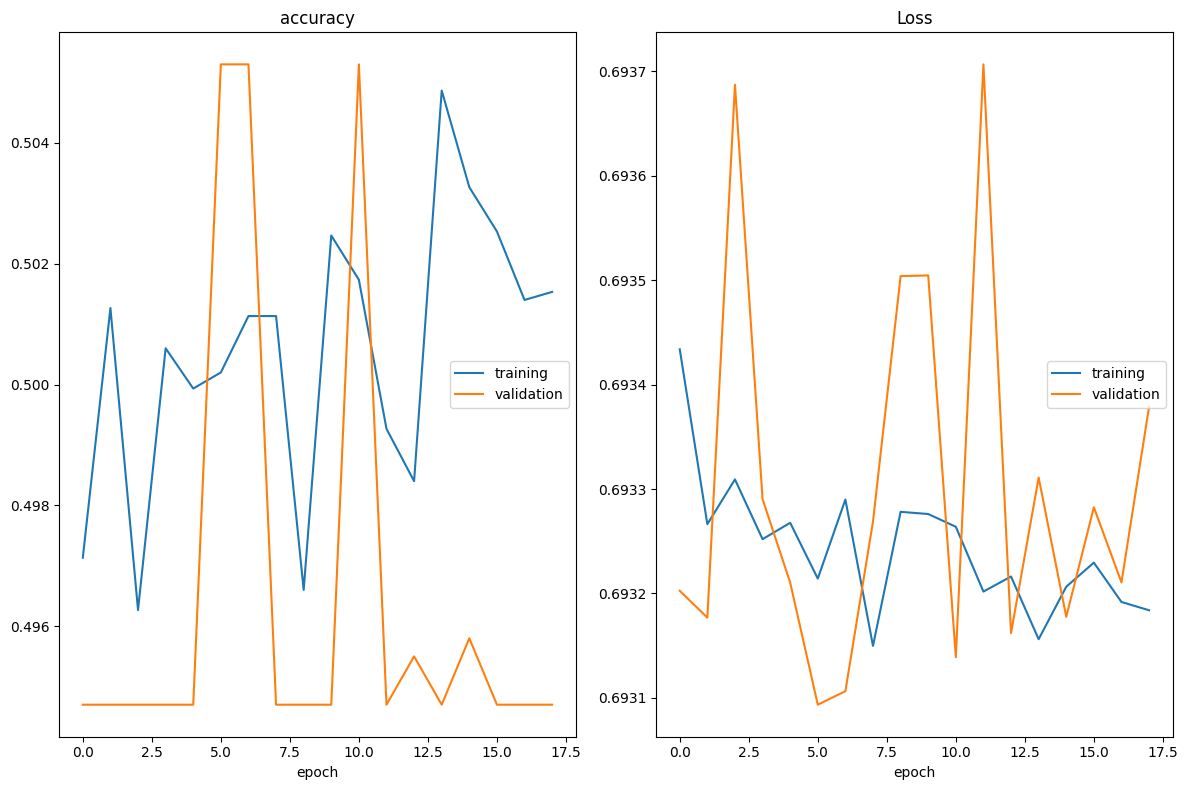

accuracy
	training         	 (min:    0.496, max:    0.505, cur:    0.502)
	validation       	 (min:    0.495, max:    0.505, cur:    0.495)
Loss
	training         	 (min:    0.693, max:    0.693, cur:    0.693)
	validation       	 (min:    0.693, max:    0.694, cur:    0.693)
30/30 [==============================] - 18s 613ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6934 - val_accuracy: 0.4947


In [17]:
plot_losses = livelossplot.PlotLossesKeras()
estop = EarlyStopping(monitor='val_accuracy', mode='max', patience=7, start_from_epoch=7, restore_best_weights=True)

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    callbacks=[plot_losses, estop],
    # validation_split=0.2
    validation_data=(x_val, y_val)
)

In [18]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: %.3f' % (test_loss * 100))
print('Test Accuracy: %.3f' % (test_acc * 100))

Test Loss: 69.315
Test Accuracy: 50.000


In [19]:
loss = history.history['loss']
accu = history.history['accuracy']
v_loss = history.history['val_loss']
v_accu = history.history['val_accuracy']
for i in range(len(loss)):
    s = 'epochs: {:>2d}, loss: {:>7.3%}, accuracy: {:.3%},  val_loss: {:.3%}, val_accuracy: {:.3%}'.format((i+1), (loss[i]), (accu[i]), (v_loss[i]), (v_accu[i]))
    print(s)

epochs:  1, loss: 69.343%, accuracy: 49.713%,  val_loss: 69.320%, val_accuracy: 49.470%
epochs:  2, loss: 69.327%, accuracy: 50.127%,  val_loss: 69.318%, val_accuracy: 49.470%
epochs:  3, loss: 69.331%, accuracy: 49.627%,  val_loss: 69.369%, val_accuracy: 49.470%
epochs:  4, loss: 69.325%, accuracy: 50.060%,  val_loss: 69.329%, val_accuracy: 49.470%
epochs:  5, loss: 69.327%, accuracy: 49.993%,  val_loss: 69.321%, val_accuracy: 49.470%
epochs:  6, loss: 69.321%, accuracy: 50.020%,  val_loss: 69.309%, val_accuracy: 50.530%
epochs:  7, loss: 69.329%, accuracy: 50.113%,  val_loss: 69.311%, val_accuracy: 50.530%
epochs:  8, loss: 69.315%, accuracy: 50.113%,  val_loss: 69.327%, val_accuracy: 49.470%
epochs:  9, loss: 69.328%, accuracy: 49.660%,  val_loss: 69.350%, val_accuracy: 49.470%
epochs: 10, loss: 69.328%, accuracy: 50.247%,  val_loss: 69.350%, val_accuracy: 49.470%
epochs: 11, loss: 69.326%, accuracy: 50.173%,  val_loss: 69.314%, val_accuracy: 50.530%
epochs: 12, loss: 69.320%, accur

In [ ]:
predictions = model.predict(x_test, verbose=0)

In [21]:
# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

Прогнозоване: 1, Фактичне: 0.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 0.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 0.0
Прогнозоване: 1, Фактичне: 0.0
Прогнозоване: 1, Фактичне: 1.0


## BRNN

In [8]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          320000    
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [12]:
history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 342s 616ms/step - loss: 0.6935 - acc: 0.4987 - val_loss: 0.6930 - val_acc: 0.5132
Epoch 2/5
547/547 [==============================] - 339s 619ms/step - loss: 0.6929 - acc: 0.5075 - val_loss: 0.6920 - val_acc: 0.5204
Epoch 3/5
547/547 [==============================] - 338s 617ms/step - loss: 0.6923 - acc: 0.5182 - val_loss: 0.6919 - val_acc: 0.5212
Epoch 4/5
547/547 [==============================] - 305s 557ms/step - loss: 0.6913 - acc: 0.5251 - val_loss: 0.6914 - val_acc: 0.5293
Epoch 5/5
547/547 [==============================] - 338s 619ms/step - loss: 0.6918 - acc: 0.5273 - val_loss: 0.6900 - val_acc: 0.5339


In [13]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: %.3f' % (test_loss * 100))
print('Test Accuracy: %.3f' % (test_acc * 100))

Test Loss: 68.854
Test Accuracy: 54.072


In [16]:
predictions = model.predict(x_test, verbose=0)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

Прогнозоване: 1, Фактичне: 0.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 0, Фактичне: 0.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 0.0
Прогнозоване: 1, Фактичне: 0.0
Прогнозоване: 0, Фактичне: 1.0


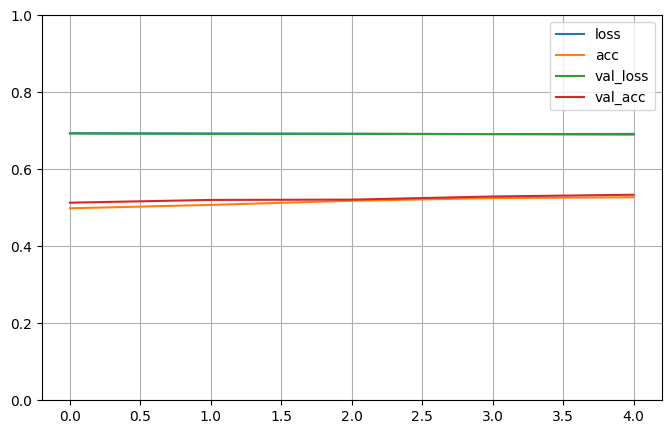

In [18]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Deep BRNN

In [19]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_1 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_2 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [22]:
history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.3)

Epoch 1/5
547/547 [==============================] - 649s 1s/step - loss: 0.6934 - acc: 0.5047 - val_loss: 0.6926 - val_acc: 0.5112
Epoch 2/5
547/547 [==============================] - 640s 1s/step - loss: 0.6925 - acc: 0.5114 - val_loss: 0.6921 - val_acc: 0.5183
Epoch 3/5
547/547 [==============================] - 643s 1s/step - loss: 0.6920 - acc: 0.5181 - val_loss: 0.6915 - val_acc: 0.5253
Epoch 4/5
547/547 [==============================] - 638s 1s/step - loss: 0.6909 - acc: 0.5324 - val_loss: 0.6914 - val_acc: 0.5328
Epoch 5/5
547/547 [==============================] - 637s 1s/step - loss: 0.6939 - acc: 0.5173 - val_loss: 0.6903 - val_acc: 0.5329


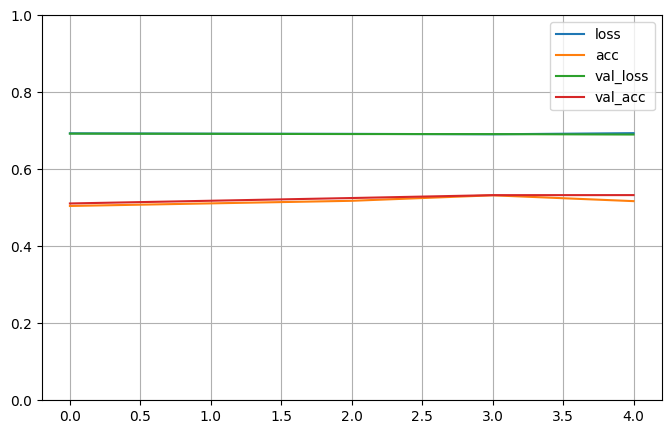

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [24]:
predictions = model.predict(x_test, verbose=0)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred >= 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

Прогнозоване: 1, Фактичне: 0.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 0, Фактичне: 0.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 1.0
Прогнозоване: 1, Фактичне: 0.0
Прогнозоване: 1, Фактичне: 0.0
Прогнозоване: 0, Фактичне: 1.0


## Висновки (невтішні).
Щось незрозуміле. Значення помилки доволі високе, точність на рівні 50%, що не дозволяє правильно спрогнозувати результат.  

Найпростіша модель RNN без LTSM або GRU навчается дуже повільно та сильно утилізує ресурс GPU.